In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df["isFraud"].value_counts()

isFraud
0    635441
1       821
Name: count, dtype: int64

In [11]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    636260
1         2
Name: count, dtype: int64

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.shape

(636262, 11)

In [15]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

0.13

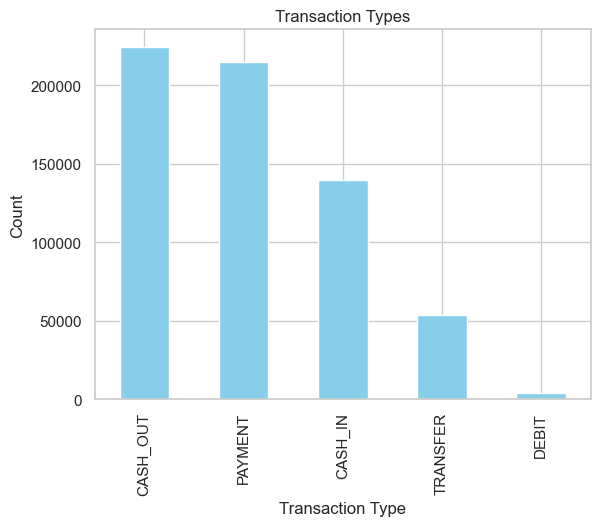

In [16]:
df["type"].value_counts().plot(kind="bar",title="Transaction Types",color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [18]:
fraud_by_type

type
TRANSFER    0.007768
CASH_OUT    0.001815
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

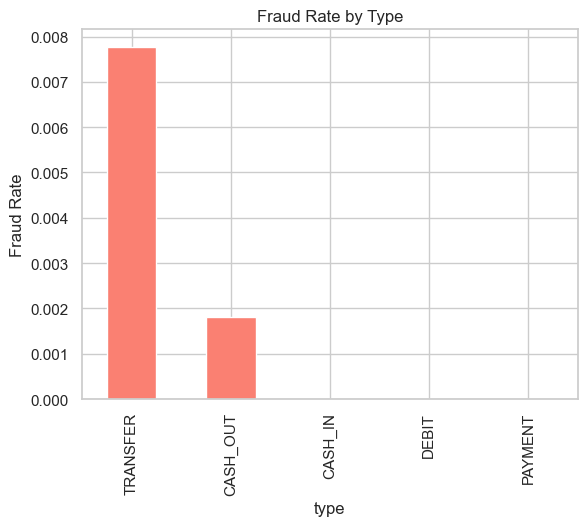

In [17]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [5]:
df["amount"].describe().astype(int)

count      636262
mean       180058
std        606971
min             0
25%         13407
50%         74815
75%        208498
max      57229615
Name: amount, dtype: int32

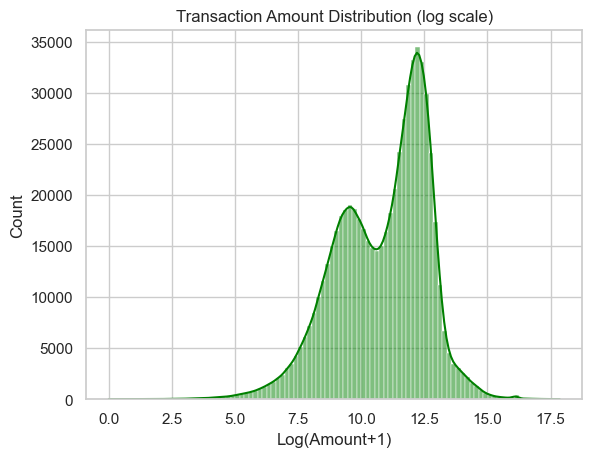

In [6]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount+1)")
plt.show()

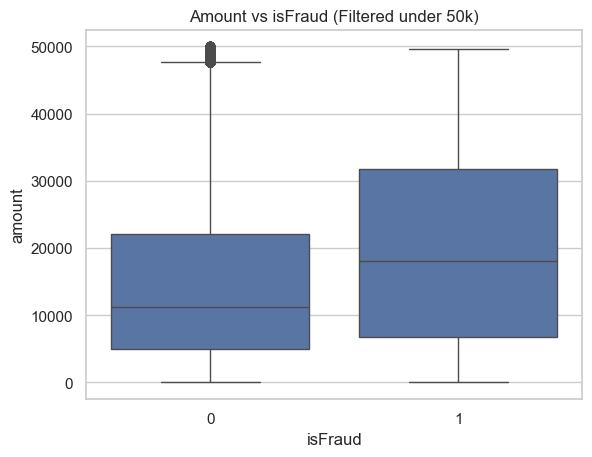

In [7]:
sns.boxplot(data=df[df["amount"]<50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [10]:
(df["balanceDiffOrig"]<0).sum()

139612

In [11]:
(df["balanceDiffDest"]<0).sum()

123556

In [13]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0,-210329.85,-210329.84
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0,21518.00,449198.34


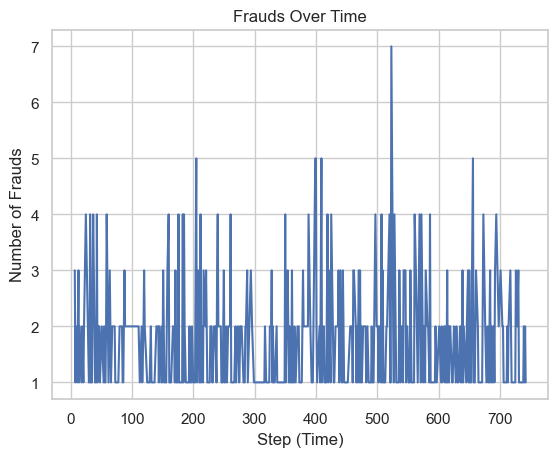

In [14]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values,label="Frauds Per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [15]:
df.drop(columns="step", inplace=True)

In [16]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0,-210329.85,-210329.84
1,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0,21518.00,449198.34
2,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0,4431.05,4431.05
3,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0,46909.73,214026.20
4,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0,0.00,8858.45


In [17]:
top_senders=df["nameOrig"].value_counts().head(10)

In [18]:
top_senders

nameOrig
C334643493     2
C288001979     2
C21821244      2
C1612765417    2
C1942864508    2
C673210061     2
C1718070623    2
C1166822525    2
C1019977227    2
C123337016     2
Name: count, dtype: int64

In [19]:
top_receivers=df["nameDest"].value_counts().head(10)

In [20]:
top_receivers

nameDest
C2083562754    14
C1023714065    14
C1590550415    14
C1219369531    14
C1339257929    13
C1529115495    13
C985934102     13
C1440282299    13
C703976121     13
C998351292     13
Name: count, dtype: int64

In [21]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [22]:
fraud_users

nameOrig
C2101131639    1
C946427395     1
C1472339088    1
C293823168     1
C1516853965    1
C159949095     1
C2065498878    1
C1295812229    1
C1968880739    1
C2114453314    1
Name: count, dtype: int64

In [23]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [24]:
fraud_types["type"].value_counts()

type
CASH_OUT    224216
TRANSFER     53294
Name: count, dtype: int64

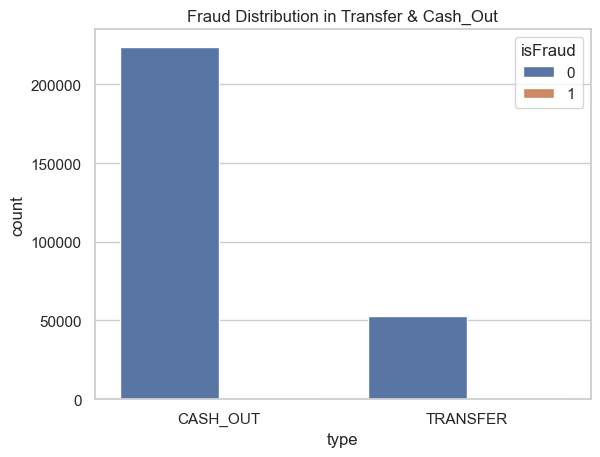

In [25]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [4]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()


In [5]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.003341,-0.008363,0.282838,0.455767,0.074150
oldbalanceOrg,-0.003341,1.000000,0.998810,0.069257,0.044569,0.009551
newbalanceOrig,-0.008363,0.998810,1.000000,0.070789,0.044342,-0.008293
oldbalanceDest,0.282838,0.069257,0.070789,1.000000,0.974067,-0.006145
newbalanceDest,0.455767,0.044569,0.044342,0.974067,1.000000,0.000185
isFraud,0.074150,0.009551,-0.008293,-0.006145,0.000185,1.000000


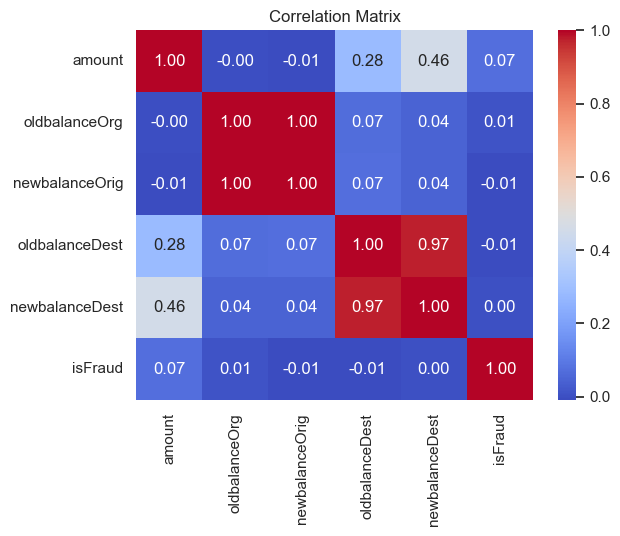

In [6]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
zero_after_transfer= df[
    (df["oldbalanceOrg"]>0)&
    (df["newbalanceOrig"]==0)&
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
                        ]

In [8]:
len(zero_after_transfer)

119172

In [9]:
zero_after_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.0,C467105520,6345756.55,6794954.89,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.0,C1059379810,13467450.36,13681476.56,0,0
7,183,CASH_OUT,62655.01,C309960888,18997.00,0.0,C1715810305,130706.17,193361.18,0,0
17,137,CASH_OUT,317575.58,C1490538273,20047.77,0.0,C1396438141,1192790.00,1759040.77,0,0
19,159,CASH_OUT,254252.74,C1022177576,32778.00,0.0,C1164758175,0.00,254252.74,0,0


In [10]:
df["isFraud"].value_counts()

isFraud
0    635441
1       821
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [13]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [15]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,283,CASH_IN,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,0
1,132,CASH_OUT,215489.19,21518.00,0.00,6345756.55,6794954.89,0
2,355,DEBIT,4431.05,20674.00,16242.95,80876.56,85307.61,0
3,135,CASH_OUT,214026.20,46909.73,0.00,13467450.36,13681476.56,0
4,381,CASH_OUT,8858.45,0.00,0.00,1667180.58,1676039.03,0


In [16]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [17]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [19]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder="drop"
)

In [21]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [22]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [23]:
y_pred=pipeline.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    190633
           1       0.02      0.98      0.04       246

    accuracy                           0.94    190879
   macro avg       0.51      0.96      0.51    190879
weighted avg       1.00      0.94      0.97    190879



In [25]:
confusion_matrix(y_test,y_pred)

array([[180010,  10623],
       [     4,    242]], dtype=int64)

In [27]:
pipeline.score(X_test,y_test)*100

94.43259866197958

In [28]:
import joblib

joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']